# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_cust=pd.read_csv('customer_churn_analysis.csv')
df_cust

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df_cust.drop(df_cust.columns[[3]],axis=1,inplace=True)

LABEL ENCODING

In [4]:
le=LabelEncoder()
list=['state','international plan','voice mail plan','churn']
for val in list:
    df_cust[val]=le.fit_transform(df_cust[val].astype(str))
df_cust

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


# EXPLORATORY DATA ANALYSIS 

In [5]:
df_cust.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
df_cust.tail()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0
3332,42,74,415,0,1,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,0


In [7]:
df_cust.shape

(3333, 20)

In [8]:
df_cust.dtypes

state                       int32
account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

In [9]:
df_cust.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [10]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null int32
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int32
voice mail plan           3333 non-null int32
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
chu

In [11]:
df_cust.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Data in all columns appear to have normal distribution (mean very close to 50th percentile).

In [12]:
#sns.heatmap(df_cust.isnull(),annot=True)

In [13]:
df_cust.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

CHECKING DATA SKEWNESS

In [14]:
df_cust.skew()

state                    -0.064618
account length            0.096606
area code                 1.126823
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

REMOVING DATA SKEWNESS

In [15]:
for col in df_cust.columns:
    if df_cust.skew().loc[col]>0.55:
        df_cust[col]=np.log1p(df_cust[col])
df_cust.skew()

state                    -0.064618
account length            0.096606
area code                 1.122881
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.028178
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls         -0.199368
total intl charge        -0.245287
customer service calls   -0.138568
churn                     2.018356
dtype: float64

CHECKING OUTLIERS

In [16]:
z=np.abs(zscore(df_cust))
print(z.shape)
print(np.where(z>3))

(3333, 20)
(array([   3,    4,    5,    7,    9,   22,   32,   32,   38,   41,   58,
         66,   67,   81,  115,  115,  115,  135,  144,  147,  179,  179,
        179,  180,  184,  198,  211,  214,  230,  231,  234,  241,  244,
        244,  254,  258,  269,  276,  279,  301,  314,  314,  319,  343,
        343,  343,  351,  354,  356,  358,  360,  365,  365,  372,  377,
        378,  382,  383,  405,  408,  416,  416,  425,  444,  465,  468,
        486,  488,  488,  488,  491,  492,  493,  495,  498,  502,  503,
        514,  529,  533,  533,  542,  546,  547,  553,  567,  569,  572,
        586,  595,  595,  595,  601,  613,  616,  619,  626,  646,  679,
        692,  708,  712,  712,  712,  715,  716,  734,  735,  737,  740,
        749,  762,  762,  762,  766,  771,  773,  777,  779,  780,  781,
        783,  790,  792,  797,  808,  817,  821,  821,  826,  830,  837,
        842,  851,  869,  877,  878,  878,  878,  883,  883,  889,  889,
        893,  900,  922,  922,  933,  9

REMOVING OUTLIERS

In [17]:
df_final=df_cust.loc[(z<3).all(axis=1)]
print(df_final.shape)

(2936, 20)


BOXPLOT

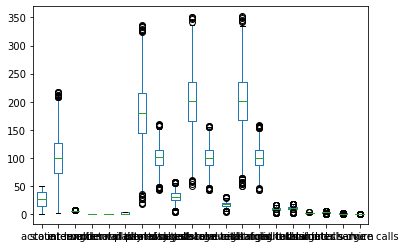

In [18]:
df_final.plot.box()

CORRELATION

In [19]:
df_final.corr()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.001791,0.007481,NaN,-0.036951,-0.037448,-0.012918,0.007741,-0.012917,0.005692,-0.013156,0.005684,0.025925,0.002775,0.025920,0.000418,0.010828,0.000427,-0.028389,0.015420
account length,0.001791,1.000000,-0.014198,NaN,0.002566,-0.000886,0.006018,0.038141,0.006016,-0.006704,0.024384,-0.006693,-0.016647,-0.020879,-0.016649,0.020629,0.033745,0.020641,-0.016530,0.005491
area code,0.007481,-0.014198,1.000000,NaN,0.005816,0.005426,-0.000032,-0.004942,-0.000033,0.001611,-0.004548,0.001632,-0.001105,0.014693,-0.001132,-0.006529,-0.028924,-0.006647,0.032680,-0.006472
international plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice mail plan,-0.036951,0.002566,0.005816,NaN,1.000000,0.995392,-0.001369,-0.020618,-0.001375,0.015184,-0.005319,0.015200,-0.001299,0.008832,-0.001311,-0.008349,-0.000819,-0.008319,-0.017253,-0.118093
number vmail messages,-0.037448,-0.000886,0.005426,NaN,0.995392,1.000000,0.000071,-0.020353,0.000064,0.013115,-0.004926,0.013131,-0.000019,0.006517,-0.000033,-0.006826,0.001369,-0.006801,-0.015642,-0.114632
total day minutes,-0.012918,0.006018,-0.000032,NaN,-0.001369,0.000071,1.000000,0.003727,1.000000,0.006920,0.029758,0.006907,0.006435,0.023542,0.006421,-0.026608,0.001528,-0.026517,0.000115,0.225202
total day calls,0.007741,0.038141,-0.004942,NaN,-0.020618,-0.020353,0.003727,1.000000,0.003732,-0.008157,0.013641,-0.008155,0.009065,-0.023989,0.009065,0.024569,0.012951,0.024688,-0.023832,0.037326
total day charge,-0.012917,0.006016,-0.000033,NaN,-0.001375,0.000064,1.000000,0.003732,1.000000,0.006924,0.029758,0.006911,0.006433,0.023548,0.006419,-0.026608,0.001529,-0.026518,0.000109,0.225202
total eve minutes,0.005692,-0.006704,0.001611,NaN,0.015184,0.013115,0.006920,-0.008157,0.006924,1.000000,-0.027692,1.000000,-0.004582,0.006417,-0.004588,-0.010661,0.008183,-0.010661,-0.019923,0.092982


PAIRPLOT

In [20]:
#sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [21]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

      state  account length  area code  international plan  voice mail plan  \
0        16             128   6.030685                 0.0         0.693147   
1        35             107   6.030685                 0.0         0.693147   
2        31             137   6.030685                 0.0         0.000000   
6        19             121   6.236370                 0.0         0.693147   
8        18             117   6.013715                 0.0         0.000000   
...     ...             ...        ...                 ...              ...   
3327     40              79   6.030685                 0.0         0.000000   
3328      3             192   6.030685                 0.0         0.693147   
3329     49              68   6.030685                 0.0         0.000000   
3330     39              28   6.236370                 0.0         0.000000   
3332     42              74   6.030685                 0.0         0.693147   

      number vmail messages  total day minutes  tot

In [22]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10,stratify=y)

In [24]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2055, 19) (881, 19)
(2055,) (881,)


CLASSIFIERS

In [25]:
knn=KNeighborsClassifier(n_neighbors=10)
dtc=DecisionTreeClassifier(random_state=10)
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [26]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))

FUNCTION DECLARATION

************* KNeighborsClassifier *************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score =  1.0


cross_val_score =  1.0


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       881

    accuracy                           1.00       881
   macro avg       1.00      1.00      1.00       881
weighted avg       1.00      1.00      1.00       881



[[881]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************* DecisionTreeClassifier *************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       mi

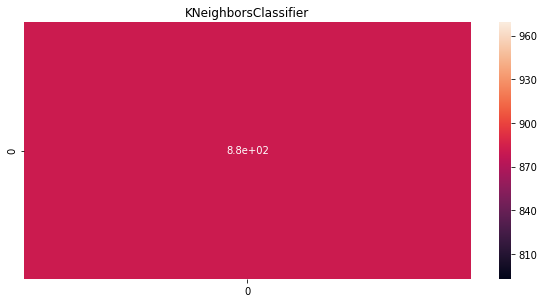

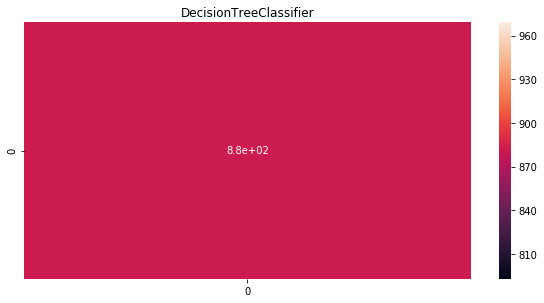

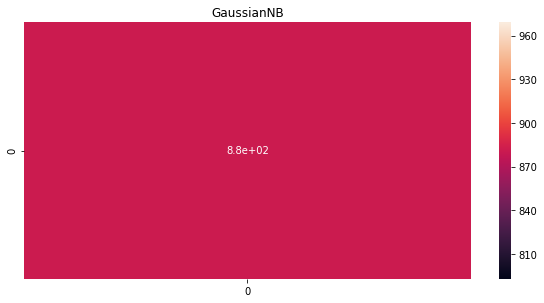

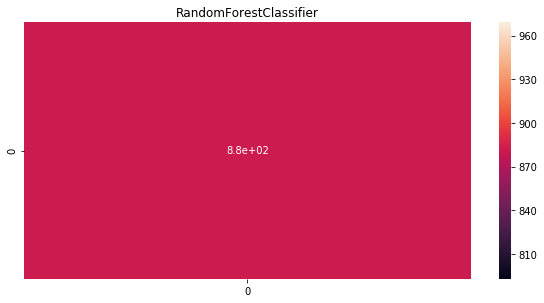

In [27]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************',name,'*************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.astype(int))
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test.astype(int),y_pred.astype(int))
    print('Accuracy Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y.astype(int),cv=10,scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test.astype(int),y_pred.astype(int)))
    print('\n')
    cm=confusion_matrix(y_test.astype(int),y_pred.astype(int))
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

# BEST MODEL

In [28]:
result=pd.DataFrame({'Model ':Model,'Accuracy Score ':score,'Cross_Val_Score':cvs})
result

,Model,Accuracy Score,Cross_Val_Score
0,KNeighborsClassifier,100.0,100.0
1,DecisionTreeClassifier,100.0,100.0
2,GaussianNB,100.0,100.0
3,RandomForestClassifier,100.0,100.0


I choose KNeighbors Classifier for this dataset.

# PICKLE

In [29]:
joblib.dump(knn,"cust.pkl")

['cust.pkl']